<a href="https://colab.research.google.com/github/SatChittAnand/Stock-Price-Prediction-SBI-NS/blob/main/stocksbins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#yahoo finance SBINS
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=yf.Ticker("SBIN.NS").history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,11.881039,12.063963,11.785079,11.965004,43733533,0.0,0.0
1996-01-02 00:00:00+05:30,12.009985,12.054966,11.275292,11.584164,56167280,0.0,0.0
1996-01-03 00:00:00+05:30,11.650133,11.803068,11.215314,11.275290,68296318,0.0,0.0
1996-01-04 00:00:00+05:30,11.125357,11.335268,10.948430,11.236310,86073880,0.0,0.0
1996-01-05 00:00:00+05:30,11.275293,11.305280,11.098367,11.173336,76613039,0.0,0.0


In [ ]:
df['10_Day_MA'] = df['Close'].rolling(window=2).mean().shift(1)
display(df.tail(10))

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10_Day_MA
Date,,,,,,,,
2025-10-23 00:00:00+05:30,912.000000,918.000000,904.799988,911.549988,13382769,0.0,0.0,907.674988
2025-10-24 00:00:00+05:30,910.950012,914.099976,900.950012,904.500000,5313227,0.0,0.0,909.699982
2025-10-27 00:00:00+05:30,906.950012,928.000000,906.000000,922.750000,9150761,0.0,0.0,908.024994
2025-10-28 00:00:00+05:30,927.099976,935.849976,917.700012,930.250000,22066289,0.0,0.0,913.625000
2025-10-29 00:00:00+05:30,933.900024,942.049988,930.250000,939.750000,12314222,0.0,0.0,926.500000
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,0.0,0.0,935.000000
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,0.0,0.0,937.049988
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,0.0,0.0,935.674988
2025-11-04 00:00:00+05:30,951.000000,959.299988,941.500000,957.599976,19154518,0.0,0.0,943.350006


In [ ]:
def add_moving_averages(data):
  data['Weekly_MA'] = data['Close'].rolling(window=5).mean().shift(1)
  data['Monthly_MA'] = data['Close'].rolling(window=21).mean().shift(1)
  data['Yearly_MA'] = data['Close'].rolling(window=252).mean().shift(1)
  data['MA_ratio_W/M'] = data['Weekly_MA'] / data['Monthly_MA']
  data['MA_ratio_M/Y'] = data['Monthly_MA'] / data['Yearly_MA']
  data['MA_ratio_W/Y'] = data['Weekly_MA'] / data['Yearly_MA']
  return data

add_moving_averages(df)
print(df.shape)
df.tail(5)

(7493, 14)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,10_Day_MA,Weekly_MA,Monthly_MA,Yearly_MA,MA_ratio_W/M,MA_ratio_M/Y,MA_ratio_W/Y
Date,,,,,,,,,,,,,,
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,0.0,0.0,935.000000,921.759998,888.599999,794.684063,1.037317,1.118180,1.159907
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,0.0,0.0,937.049988,926.319995,891.628569,795.300889,1.038908,1.121121,1.164742
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,0.0,0.0,935.674988,932.819995,894.702378,795.981137,1.042604,1.124025,1.171912
2025-11-04 00:00:00+05:30,951.000000,959.299988,941.500000,957.599976,19154518,0.0,0.0,943.350006,938.209998,898.778570,796.668601,1.043872,1.128171,1.177667
2025-11-06 00:00:00+05:30,969.650024,971.400024,955.299988,960.750000,23084435,0.0,0.0,953.649994,943.679993,903.078570,797.229280,1.044959,1.132771,1.183700


In [ ]:
def add_MA_std_dev(data):
  data['Weekly_MA_std'] = data['Close'].rolling(window=5).std().shift(1)
  data['Monthly_MA_std'] = data['Close'].rolling(window=21).std().shift(1)
  data['Yearly_MA_std'] = data['Close'].rolling(window=252).std().shift(1)
  data['ratio_std_W/M']=data['Weekly_MA_std']/data['Monthly_MA_std']
  data['ratio_std_M/Y']=data['Monthly_MA_std']/data['Yearly_MA_std']
  data['ratio_std_W/Y']=data['Weekly_MA_std']/data['Yearly_MA_std']
  return data

add_MA_std_dev(df)
print(df.shape)
df.tail(5)


(7493, 20)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,10_Day_MA,Weekly_MA,Monthly_MA,Yearly_MA,MA_ratio_W/M,MA_ratio_M/Y,MA_ratio_W/Y,Weekly_MA_std,Monthly_MA_std,Yearly_MA_std,ratio_std_W/M,ratio_std_M/Y,ratio_std_W/Y
Date,,,,,,,,,,,,,,,,,,,,
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,0.0,0.0,935.000000,921.759998,888.599999,794.684063,1.037317,1.118180,1.159907,14.131987,23.774298,49.402891,0.594423,0.481233,0.286056
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,0.0,0.0,937.049988,926.319995,891.628569,795.300889,1.038908,1.121121,1.164742,13.685280,25.383229,50.169590,0.539147,0.505949,0.272780
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,0.0,0.0,935.674988,932.819995,894.702378,795.981137,1.042604,1.124025,1.171912,6.630383,26.812778,50.921488,0.247284,0.526551,0.130208
2025-11-04 00:00:00+05:30,951.000000,959.299988,941.500000,957.599976,19154518,0.0,0.0,943.350006,938.209998,898.778570,796.668601,1.043872,1.128171,1.177667,7.316377,28.388212,51.818399,0.257726,0.547840,0.141193
2025-11-06 00:00:00+05:30,969.650024,971.400024,955.299988,960.750000,23084435,0.0,0.0,953.649994,943.679993,903.078570,797.229280,1.044959,1.132771,1.183700,9.709827,30.165028,52.787091,0.321890,0.571447,0.183943


In [ ]:
def add_MA_vol(data):
  data['Weekly_MA_v'] =   data['Volume'].rolling(window=5).mean().shift(1)
  data['Monthly_MA_v'] = data['Volume'].rolling(window=21).mean().shift(1)
  data['Yearly_MA_v'] = data['Volume'].rolling(window=252).mean().shift(1)
  data['ratio_v_W/M']=data['Weekly_MA_v']/data['Monthly_MA_v']
  data['ratio_v_M/Y']=data['Monthly_MA_v']/data['Yearly_MA_v']
  data['ratio_v_W/Y']=data['Weekly_MA_v']/data['Yearly_MA_v']
  return data

add_MA_vol(df)
print(df.shape)
df.tail(5)


(7493, 26)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,10_Day_MA,Weekly_MA,Monthly_MA,...,Yearly_MA_std,ratio_std_W/M,ratio_std_M/Y,ratio_std_W/Y,Weekly_MA_v,Monthly_MA_v,Yearly_MA_v,ratio_v_W/M,ratio_v_M/Y,ratio_v_W/Y
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,0.0,0.0,935.000000,921.759998,888.599999,...,49.402891,0.594423,0.481233,0.286056,12445453.6,1.055785e+07,1.109236e+07,1.178787,0.951813,1.121985
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,0.0,0.0,937.049988,926.319995,891.628569,...,50.169590,0.539147,0.505949,0.272780,12377794.4,1.010084e+07,1.112187e+07,1.225422,0.908196,1.112924
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,0.0,0.0,935.674988,932.819995,894.702378,...,50.921488,0.247284,0.526551,0.130208,13730799.4,1.006497e+07,1.113124e+07,1.364217,0.904209,1.233538
2025-11-04 00:00:00+05:30,951.000000,959.299988,941.500000,957.599976,19154518,0.0,0.0,943.350006,938.209998,898.778570,...,51.818399,0.257726,0.547840,0.141193,14249594.2,1.010841e+07,1.112325e+07,1.409677,0.908764,1.281064
2025-11-06 00:00:00+05:30,969.650024,971.400024,955.299988,960.750000,23084435,0.0,0.0,953.649994,943.679993,903.078570,...,52.787091,0.321890,0.571447,0.183943,13667240.0,1.063865e+07,1.108706e+07,1.284678,0.959556,1.232720


In [ ]:
def add_MA_return(data):
  data['Daily_return'] = data['Close'].pct_change(periods=1).shift(1)
  data['Weekly_return'] = data['Close'].pct_change(periods=5).shift(1)
  data['Monthly_return'] = data['Close'].pct_change(periods=21).shift(1)
  data['Yearly_return'] = data['Close'].pct_change(periods=252).shift(1)
  data['Weekly_return_MA'] = data['Weekly_return'].rolling(window=5).mean().shift(1)
  data['Monthly_return_MA'] = data['Monthly_return'].rolling(window=21).mean().shift(1)
  data['Yearly_return_MA'] = data['Yearly_return'].rolling(window=252).mean().shift(1)
  return data

add_MA_return(df)
print(df.shape)
df.tail(5)

(7493, 33)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,10_Day_MA,Weekly_MA,Monthly_MA,...,ratio_v_W/M,ratio_v_M/Y,ratio_v_W/Y,Daily_return,Weekly_return,Monthly_return,Yearly_return,Weekly_return_MA,Monthly_return_MA,Yearly_return_MA
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,0.0,0.0,935.000000,921.759998,888.599999,...,1.178787,0.951813,1.121985,0.010212,0.035138,0.096622,0.219618,0.029320,0.067355,0.125467
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,0.0,0.0,937.049988,926.319995,891.628569,...,1.225422,0.908196,1.112924,-0.005746,0.025012,0.073040,0.199561,0.029301,0.068690,0.124895
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,0.0,0.0,935.674988,932.819995,894.702378,...,1.364217,0.904209,1.233538,0.002836,0.035931,0.073987,0.223913,0.028559,0.068118,0.124091
2025-11-04 00:00:00+05:30,951.000000,959.299988,941.500000,957.599976,19154518,0.0,0.0,943.350006,938.209998,898.778570,...,1.409677,0.908764,1.281064,0.013554,0.029206,0.099063,0.223117,0.031788,0.067719,0.123474
2025-11-06 00:00:00+05:30,969.650024,971.400024,955.299988,960.750000,23084435,0.0,0.0,953.649994,943.679993,903.078570,...,1.284678,0.959556,1.232720,0.008318,0.029401,0.104116,0.173085,0.030071,0.068870,0.122784


In [ ]:
#drop divident and stock splits column

df.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()

(6988, 31)


,Open,High,Low,Close,Volume,10_Day_MA,Weekly_MA,Monthly_MA,Yearly_MA,MA_ratio_W/M,...,ratio_v_W/M,ratio_v_M/Y,ratio_v_W/Y,Daily_return,Weekly_return,Monthly_return,Yearly_return,Weekly_return_MA,Monthly_return_MA,Yearly_return_MA
Date,,,,,,,,,,,,,,,,,,,,,
1997-12-08 00:00:00+05:30,13.133849,13.459811,12.872463,13.382934,84726268,13.213802,13.590199,14.433748,17.793033,0.941557,...,1.158753,0.679325,0.787170,-0.016159,-0.026718,-0.179753,-0.018106,-0.008746,-0.135370,0.171397
1997-12-09 00:00:00+05:30,13.389086,13.401387,12.807888,13.115400,72512971,13.244554,13.473958,14.315868,17.793329,0.941190,...,1.105677,0.710736,0.785844,0.021117,-0.041621,-0.156099,0.005603,0.001609,-0.141752,0.170867
1997-12-10 00:00:00+05:30,12.921663,13.130772,12.614152,12.780209,77113823,13.249167,13.312207,14.187591,17.791008,0.938299,...,1.019166,0.740005,0.754189,-0.019991,-0.058083,-0.170395,-0.042682,-0.012190,-0.146248,0.170299
1997-12-11 00:00:00+05:30,12.764832,13.069268,12.460395,12.958565,88205788,12.947804,13.141229,14.034128,17.787514,0.936377,...,1.105113,0.765257,0.845695,-0.025557,-0.062698,-0.201384,-0.064452,-0.029205,-0.149639,0.169276
1997-12-12 00:00:00+05:30,12.970864,13.241475,12.798658,12.995466,64407162,12.869387,13.068656,13.907169,17.784813,0.939706,...,1.149893,0.792620,0.911429,0.013956,-0.027239,-0.170636,-0.049917,-0.046312,-0.155556,0.168164


In [ ]:
df

,Open,High,Low,Close,Volume,10_Day_MA,Weekly_MA,Monthly_MA,Yearly_MA,MA_ratio_W/M,...,ratio_v_W/M,ratio_v_M/Y,ratio_v_W/Y,Daily_return,Weekly_return,Monthly_return,Yearly_return,Weekly_return_MA,Monthly_return_MA,Yearly_return_MA
Date,,,,,,,,,,,,,,,,,,,,,
1997-12-08 00:00:00+05:30,13.133849,13.459811,12.872463,13.382934,84726268,13.213802,13.590199,14.433748,17.793033,0.941557,...,1.158753,0.679325,0.787170,-0.016159,-0.026718,-0.179753,-0.018106,-0.008746,-0.135370,0.171397
1997-12-09 00:00:00+05:30,13.389086,13.401387,12.807888,13.115400,72512971,13.244554,13.473958,14.315868,17.793329,0.941190,...,1.105677,0.710736,0.785844,0.021117,-0.041621,-0.156099,0.005603,0.001609,-0.141752,0.170867
1997-12-10 00:00:00+05:30,12.921663,13.130772,12.614152,12.780209,77113823,13.249167,13.312207,14.187591,17.791008,0.938299,...,1.019166,0.740005,0.754189,-0.019991,-0.058083,-0.170395,-0.042682,-0.012190,-0.146248,0.170299
1997-12-11 00:00:00+05:30,12.764832,13.069268,12.460395,12.958565,88205788,12.947804,13.141229,14.034128,17.787514,0.936377,...,1.105113,0.765257,0.845695,-0.025557,-0.062698,-0.201384,-0.064452,-0.029205,-0.149639,0.169276
1997-12-12 00:00:00+05:30,12.970864,13.241475,12.798658,12.995466,64407162,12.869387,13.068656,13.907169,17.784813,0.939706,...,1.149893,0.792620,0.911429,0.013956,-0.027239,-0.170636,-0.049917,-0.046312,-0.155556,0.168164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30 00:00:00+05:30,939.450012,944.900024,933.049988,934.349976,13044473,935.000000,921.759998,888.599999,794.684063,1.037317,...,1.178787,0.951813,1.121985,0.010212,0.035138,0.096622,0.219618,0.029320,0.067355,0.125467
2025-10-31 00:00:00+05:30,934.900024,946.700012,930.250000,937.000000,12078252,937.049988,926.319995,891.628569,795.300889,1.038908,...,1.225422,0.908196,1.112924,-0.005746,0.025012,0.073040,0.199561,0.029301,0.068690,0.124895
2025-11-03 00:00:00+05:30,938.750000,953.400024,937.500000,949.700012,11744735,935.674988,932.819995,894.702378,795.981137,1.042604,...,1.364217,0.904209,1.233538,0.002836,0.035931,0.073987,0.223913,0.028559,0.068118,0.124091


In [ ]:

target = df['Close']
print(target.shape)
feature=df.drop(['Close'],axis=1)
print(feature.shape)

(6988,)
(6988, 30)


In [ ]:
split_index = int(len(feature) * 0.8)
split_ind = int(len(target) * 0.8)
X_train = feature.iloc[:split_index]
X_test = feature.iloc[split_index:]
y_train = target.iloc[:split_ind]
y_test = target.iloc[split_ind:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5590, 30), (1398, 30), (5590,), (1398,))

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss='squared_error',penalty='l2',max_iter=1000,alpha=0.1,learning_rate='constant',eta0=0.01,random_state=42)
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)

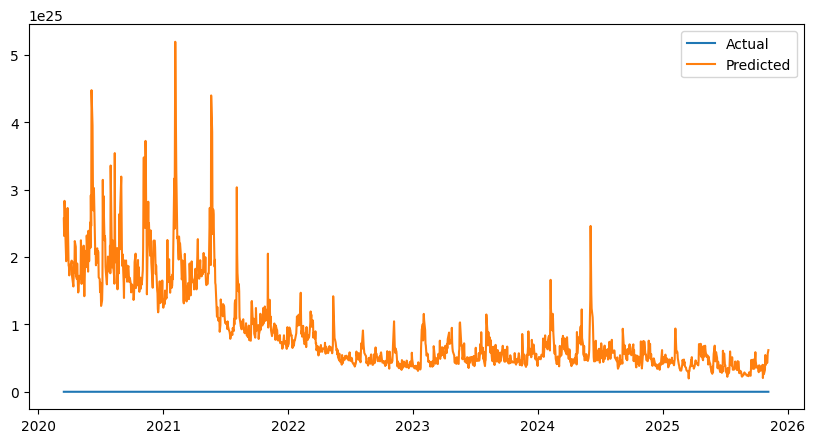

In [ ]:
#plot
plt.figure(figsize=(10,5))
plt.plot(y_test.index,y_test.values,label='Actual')
plt.plot(y_test.index,pred,label='Predicted')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
layer0=tf.keras.layers.Dense(unit)